<h1 align="center">Final Project I</h1>

**Anggota Kelompok 5 :**
- Dhelya Apriliani Putri
- Anggita Yuniskara
- M Rinande Ansutia
- Rizky Mardhatillah

# Pendahuluan 
## Uber and Lyft Dataset Boston, MA
From 11-26-2018 to 12-18-2018

Dataset yang akan di olah kali ini adalah Uber and Lyft Dataset Boston, MA. Dataset mengandung banyak nilai NA. Ini adalah kumpulan data yang bagus untuk menggunakan Model Regresi Linier dan melihat pola antara predektor yang berbeda seperti jam dan harga.

Bagian yang menarik dari kumpulan data ini adalah data ini menyertakan data cuaca yang sesuai untuk jam tersebut dengan ringkasan singkat tentang cuaca. Faktor penting lainnya adalah suhu, angin, dan matahari terbenam. 

Semoga dengan data ini kami dapat menggunakan Model Regresi Linier dengan baik.

## Import Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#import file
df_can = pd.read_csv('rideshare_kaggle.csv')

In [3]:
#lima item pertama dalam dataset
df_can.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df_can.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
#5 item terakhir dalam datset
df_can.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [6]:
# Melihhat tipe data
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
# Melihat jumlah rows dan columns
print(df_can.shape)

(693071, 57)


## Data Cleaning

In [8]:
# Menjumlah kan missing values
missing_values = df_can.isnull().sum()

In [9]:
print(missing_values[missing_values > 0])

price    55095
dtype: int64


In [10]:
# Menghapus Null values
df_can.dropna(subset=['price'], inplace=True)

In [11]:
df_can.shape

(637976, 57)

In [12]:
missing_values = df_can.isnull().sum()
missing_values

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [13]:
unique_cab_types = df_can['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [14]:
# Mengubah tipe data menjadi timeseries dengan pandas
df_can['datetime'] = pd.to_datetime(df_can['datetime'])

In [15]:
# Menjumlahkan data berdasrkan jam
hour_counts = df_can.groupby([df_can['datetime'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

In [16]:
df_can['datetime'].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: datetime, dtype: datetime64[ns]

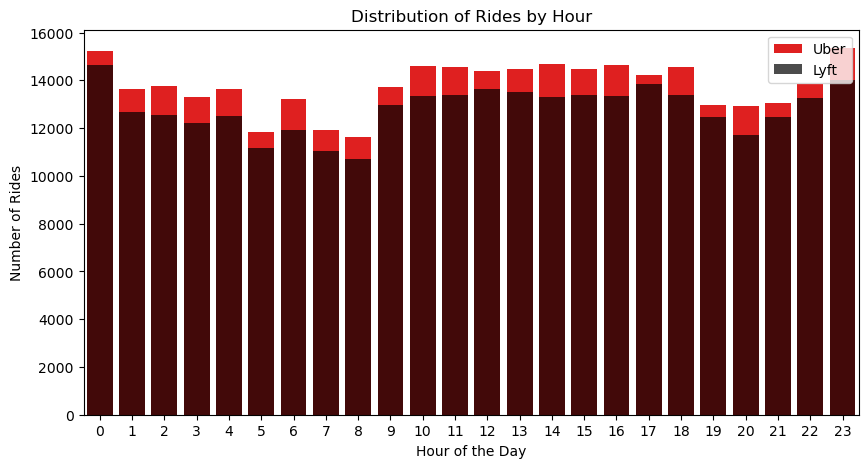

In [17]:
# Plotting Data
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_counts.index, y=hour_counts['Uber'], label='Uber', color='red')
sns.barplot(x=hour_counts.index, y=hour_counts['Lyft'], label='Lyft', color='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour')
plt.legend()
plt.show()

Dari data diatas kita dapat mengetahui bahwa jumlah frekuensi "Distribution of Rides by Hour" paling tinggi adalah pukul 23 dan 00

In [18]:
# Mengelompokkan data berdasarkan hari dan cab_type
daily_counts = df_can.groupby([df_can['datetime'].dt.day, 'cab_type'])['id'].count().unstack().fillna(0)

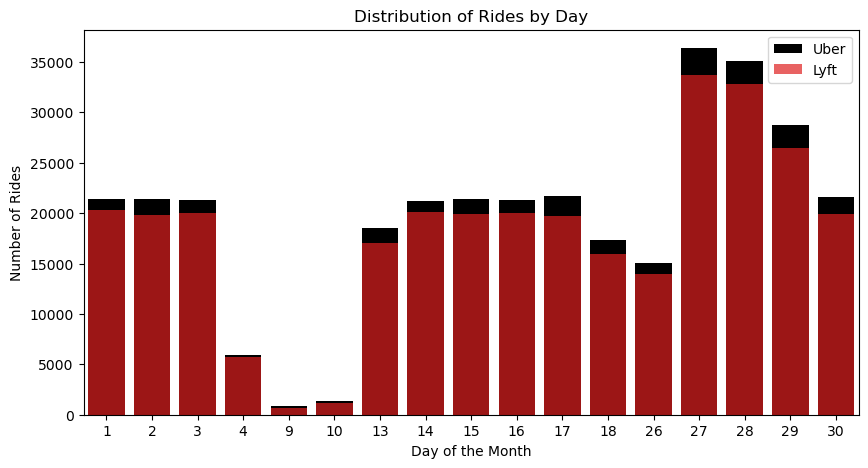

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts['Uber'], label='Uber', color='black')
sns.barplot(x=daily_counts.index, y=daily_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Day')
plt.legend()
plt.show()

In [20]:
monthly_counts = df_can.groupby([df_can['datetime'].dt.month, 'cab_type'])['id'].count().unstack().fillna(0)

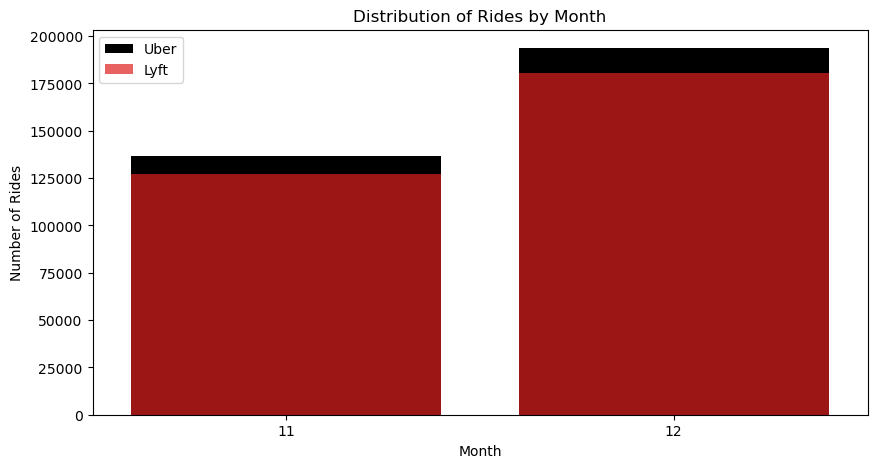

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts['Uber'], label='Uber', color='black')
sns.barplot(x=monthly_counts.index, y=monthly_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Month')
plt.legend()
plt.show()

In [22]:
source_counts = df_can.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)

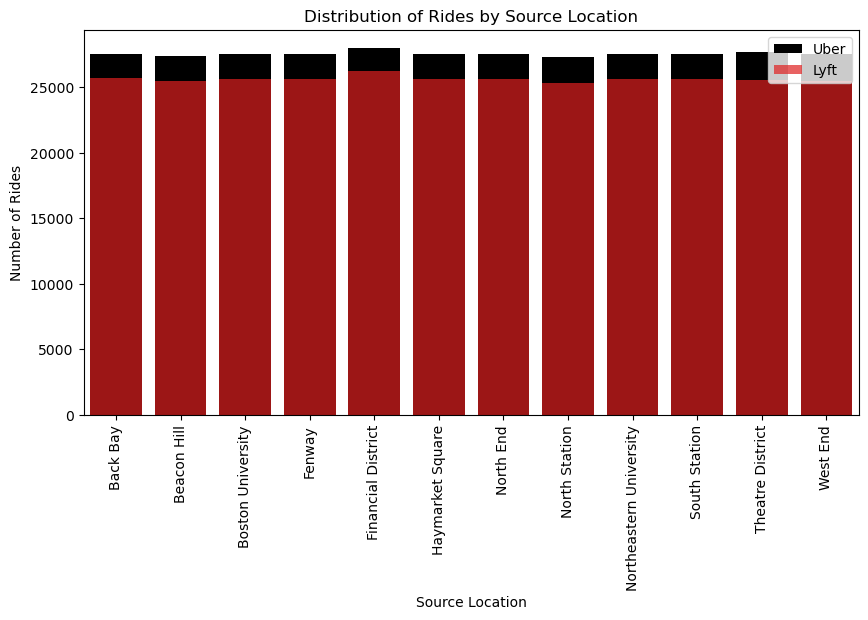

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=source_counts.index, y=source_counts['Uber'], label='Uber', color='black')
sns.barplot(x=source_counts.index, y=source_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Source Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Source Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [24]:
destination_counts = df_can.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

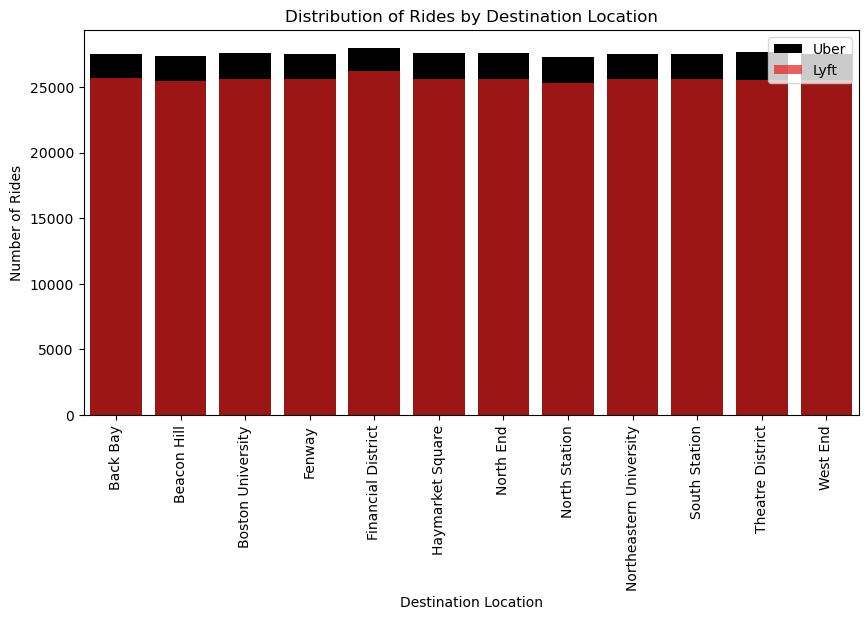

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=destination_counts.index, y=destination_counts['Uber'], label='Uber', color='black')
sns.barplot(x=destination_counts.index, y=destination_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [26]:
cab_type_counts = df_can['cab_type'].value_counts()

In [27]:
unique_cab_types = df_can['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [28]:
print("Counts of each 'cab_type':")
print(cab_type_counts)

Counts of each 'cab_type':
cab_type
Uber    330568
Lyft    307408
Name: count, dtype: int64


In [29]:
total_count = cab_type_counts.sum()
percentage_distribution = (cab_type_counts / total_count) * 100
summary_statistics = cab_type_counts.describe()

In [30]:
print("\nSummary Statistics:")
print(f"Total Count: {total_count}")
print(f"Percentage Distribution:\n{percentage_distribution}")
print("\nSummary Statistics for Count:")
print(summary_statistics)


Summary Statistics:
Total Count: 637976
Percentage Distribution:
cab_type
Uber    51.815115
Lyft    48.184885
Name: count, dtype: float64

Summary Statistics for Count:
count         2.000000
mean     318988.000000
std       16376.593052
min      307408.000000
25%      313198.000000
50%      318988.000000
75%      324778.000000
max      330568.000000
Name: count, dtype: float64


# Decision Tree
Decision tree adalah flowchart-like tree structure di mana internal node mewakili feature(atau atribute), branch mewakili decision rule, dan setiap leaf node mewakili outcome.

### 1. Tujuan Analisis:

**Prediksi Jenis Taksi:** cab_type adalah variabel dependen atau label yang tepat. Tujuannya adalah memahami bagaimana atribut-atribut lain memengaruhi atau memprediksi jenis taksi yang dipilih oleh pelanggan.
### 2. Klasifikasi Kategori:

**Penentuan Kategori:** Ketika memprediksi kategori atau label, seperti jenis taksi, dalam sebuah tugas klasifikasi memerlukan variabel dependen yang merupakan target prediksi. Dalam hal ini, cab_type akan menjadi label yang akan diprediksi oleh model.
### 3. Penentuan Jenis Taksi:

**Rekomendasi Jenis Taksi:** Model ini memungkinkan untuk memberikan rekomendasi tentang jenis taksi yang paling sesuai berdasarkan atribut lainnya. Misalnya, model dapat membantu pelanggan dalam memilih taksi yang paling efisien atau ekonomis berdasarkan waktu, harga, cuaca, atau faktor lainnya.
### 4. Analisis Pola Konsumen:

**Memahami Preferensi Konsumen:** Dengan menjadikan cab_type sebagai variabel dependen, memungkinkan untuk dapat menganalisis preferensi konsumen terhadap jenis taksi tertentu dan mengidentifikasi pola atau faktor-faktor yang memengaruhi pilihan mereka. Ini dapat membantu dalam pengambilan keputusan bisnis, pemasaran, dan perbaikan layanan.
Dengan menjadikan cab_type sebagai variabel dependen, ini memungkinkan model untuk belajar dari data historis dan melakukan prediksi atau klasifikasi jenis taksi berdasarkan atribut-atribut lainnya. Ini membantu dalam pemahaman lebih mendalam tentang perilaku konsumen dan memberikan landasan untuk pengambilan keputusan yang lebih baik dalam bisnis atau aplikasi yang melibatkan transportasi.

In [31]:
df = df_can.drop(['id','source', 'destination', 'product_id','name', 'latitude', 'longitude', 'apparentTemperature', 'short_summary', 'long_summary',
            'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
            'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
            'sunriseTime', 'sunsetTime', 'moonPhase', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis = 1)

In [32]:
df.head()

,timestamp,hour,day,month,datetime,timezone,cab_type,price,distance,surge_multiplier,...,windSpeed,windGust,windGustTime,visibility,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Lyft,5.0,0.44,1.0,...,8.66,9.17,1545015600,10.000,0.1276,1544979600,39.89,43.68,33.73,38.07
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Lyft,11.0,0.44,1.0,...,11.98,11.98,1543291200,4.786,0.1300,1543251600,40.49,47.30,36.20,43.92
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Lyft,7.0,0.44,1.0,...,7.33,7.33,1543334400,10.000,0.1064,1543338000,35.36,47.55,31.04,44.12
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Lyft,26.0,0.44,1.0,...,5.28,5.28,1543514400,10.000,0.0000,1543507200,34.67,45.03,30.30,38.53
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Lyft,9.0,0.44,1.0,...,9.14,9.14,1543446000,10.000,0.0001,1543420800,33.10,42.18,29.11,35.75


In [33]:
unique_cab_types = df['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [34]:
df.isnull().sum()

timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
cab_type                  0
price                     0
distance                  0
surge_multiplier          0
temperature               0
precipIntensity           0
precipProbability         0
humidity                  0
windSpeed                 0
windGust                  0
windGustTime              0
visibility                0
precipIntensityMax        0
uvIndexTime               0
temperatureMin            0
temperatureMax            0
apparentTemperatureMin    0
apparentTemperatureMax    0
dtype: int64

In [35]:
 df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'cab_type',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   timestamp               637976 non-null  float64       
 1   hour                    637976 non-null  int64         
 2   day                     637976 non-null  int64         
 3   month                   637976 non-null  int64         
 4   datetime                637976 non-null  datetime64[ns]
 5   timezone                637976 non-null  object        
 6   cab_type                637976 non-null  object        
 7   price                   637976 non-null  float64       
 8   distance                637976 non-null  float64       
 9   surge_multiplier        637976 non-null  float64       
 10  temperature             637976 non-null  float64       
 11  precipIntensity         637976 non-null  float64       
 12  precipProbability       637976 non-

In [37]:
# Transformasi data menjadi numerik
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['cab_type'] = enc.fit_transform(df['cab_type'].values)

In [38]:
feature_cols = ['hour', 'day', 'month', 'distance', 'price', 'temperature', 'surge_multiplier', 'precipIntensityMax', 'precipIntensity', 'uvIndexTime', 'temperatureMin', 'temperatureMax', 'humidity', 'windSpeed', 'windGust', 'apparentTemperatureMax']
X = df[feature_cols]
y = df['cab_type']

In [39]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


In [40]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9032200759693406


## Visualizing Decision Trees

In [42]:
class_names = df['cab_type'].unique().astype(str)

import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
 class_names=class_names, # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Optimizing Decision Tree Performance

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifer correct?
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.6475785425799272


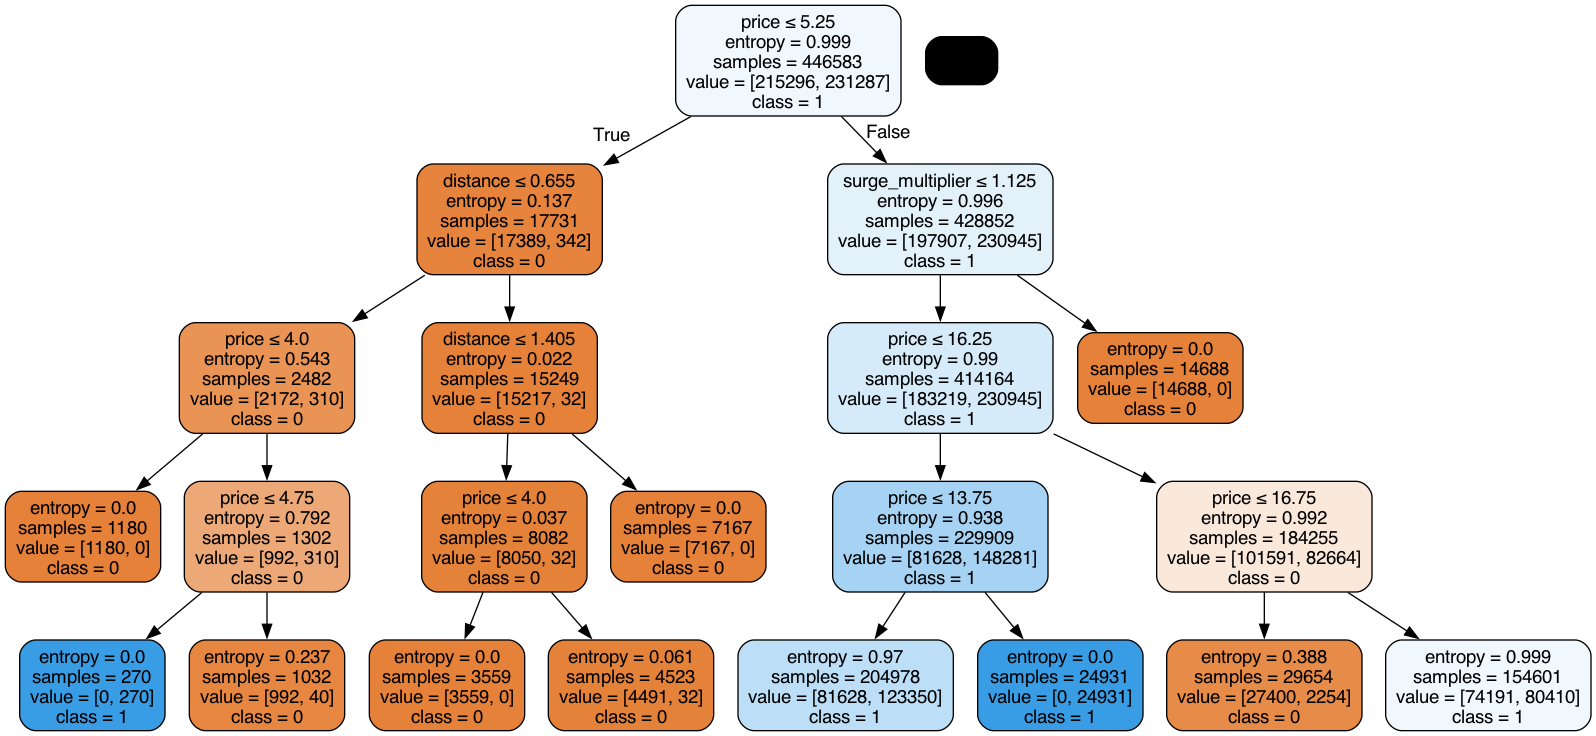

In [47]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, class_names=['0', '1'], feature_names=feature_cols, filled=True,
                    rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [49]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'cab_type',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')